In [1]:
# Libraries used

import os

import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np

from PIL import Image

import cv2

from matplotlib import pyplot as plt

In [2]:
# Constants

SOURCE_PATH = 'data/TrafficSignals'
ANNOTATION1 = 'data/TrafficSignals/Annotations/dayTrain'
ANNOTATION2 = 'data/TrafficSignals/Annotations/nightTrain'
FILENAME = 'frameAnnotationsBOX.csv'
ANNOS = [ANNOTATION1, ANNOTATION2]
df_list = list()
DESTINATION_PATH = 'ProcessedData/TrafficSignals'
DESTINATION_IMGS = 'ProcessedData/TrafficSignals/Images'

In [3]:
for img in os.listdir(DESTINATION_IMGS):
    os.remove(os.path.join(DESTINATION_IMGS, img))

In [4]:
for directory in ANNOS:
    for subdir in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory, subdir)):
            if filename == FILENAME:
                df_list.append(pd.read_csv(os.path.join(directory, subdir, filename), sep = ";"))
            else:
                pass

In [5]:
signal_annotations = pd.concat(df_list, ignore_index = True)

In [6]:
signal_annotations = signal_annotations.drop(['Origin file', 'Origin frame number', 
                                              'Origin track', 'Origin track frame number'], axis = 1)

In [7]:
def changeFilename(x):
    filename = x.Filename    
    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
    if 'nightTraining' in filename:
        return f'{SOURCE_PATH}/nightTrain/{clipName}/frames/{splitted[-1]}'
    else:
        return f'{SOURCE_PATH}/dayTrain/{clipName}/frames/{splitted[-1]}'

    
signal_annotations['Filename'] = signal_annotations.apply(changeFilename,axis=1)

In [8]:
signal_annotations

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
0,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,698,333,710,358
1,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,846,391,858,411
2,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,698,337,710,357
3,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,847,390,859,410
4,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,698,331,710,356
...,...,...,...,...,...,...
51821,data/TrafficSignals/nightTrain/nightClip5/fram...,go,937,221,976,290
51822,data/TrafficSignals/nightTrain/nightClip5/fram...,go,467,36,512,117
51823,data/TrafficSignals/nightTrain/nightClip5/fram...,go,937,219,976,288
51824,data/TrafficSignals/nightTrain/nightClip5/fram...,go,460,33,506,114


In [9]:
signal_annotations = signal_annotations.drop_duplicates(subset = ['Filename'], ignore_index=True)

In [10]:
signal_annotations

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
0,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,698,333,710,358
1,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,698,337,710,357
2,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,698,331,710,356
3,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,698,329,710,354
4,data/TrafficSignals/dayTrain/dayClip1/frames/d...,go,697,328,712,353
...,...,...,...,...,...,...
18008,data/TrafficSignals/nightTrain/nightClip5/fram...,go,483,56,528,134
18009,data/TrafficSignals/nightTrain/nightClip5/fram...,go,478,50,523,128
18010,data/TrafficSignals/nightTrain/nightClip5/fram...,go,472,45,518,120
18011,data/TrafficSignals/nightTrain/nightClip5/fram...,go,467,36,512,117


In [11]:
tags = {'go': 43, 'warning': 44, 'stop': 45}

def changeAnnotation(x):
    if 'go' in x['Annotation tag']:
        return tags['go']
    elif 'warning' in x['Annotation tag']:
        return tags['warning']
    elif 'stop' in x['Annotation tag']:
        return tags['stop']
    
signal_annotations['Annotation tag'] = signal_annotations.apply(changeAnnotation,axis=1)

In [12]:
signal_annotations

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
0,data/TrafficSignals/dayTrain/dayClip1/frames/d...,43,698,333,710,358
1,data/TrafficSignals/dayTrain/dayClip1/frames/d...,43,698,337,710,357
2,data/TrafficSignals/dayTrain/dayClip1/frames/d...,43,698,331,710,356
3,data/TrafficSignals/dayTrain/dayClip1/frames/d...,43,698,329,710,354
4,data/TrafficSignals/dayTrain/dayClip1/frames/d...,43,697,328,712,353
...,...,...,...,...,...,...
18008,data/TrafficSignals/nightTrain/nightClip5/fram...,43,483,56,528,134
18009,data/TrafficSignals/nightTrain/nightClip5/fram...,43,478,50,523,128
18010,data/TrafficSignals/nightTrain/nightClip5/fram...,43,472,45,518,120
18011,data/TrafficSignals/nightTrain/nightClip5/fram...,43,467,36,512,117


In [13]:
signal_annotations.groupby(['Annotation tag']).agg(['count'])

,Filename,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
,count,count,count,count,count
Annotation tag,,,,,
43,9443,9443,9443,9443,9443
44,392,392,392,392,392
45,8178,8178,8178,8178,8178


In [14]:
balanced_df = signal_annotations.groupby(['Annotation tag']).apply(lambda x:x.sample(200)).reset_index(drop=True)

In [15]:
balanced_df

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
0,data/TrafficSignals/dayTrain/dayClip7/frames/d...,43,1084,22,1126,117
1,data/TrafficSignals/dayTrain/dayClip7/frames/d...,43,901,163,934,238
2,data/TrafficSignals/dayTrain/dayClip5/frames/d...,43,262,294,322,384
3,data/TrafficSignals/dayTrain/dayClip5/frames/d...,43,918,124,969,214
4,data/TrafficSignals/dayTrain/dayClip4/frames/d...,43,975,334,1005,379
...,...,...,...,...,...,...
595,data/TrafficSignals/dayTrain/dayClip13/frames/...,45,354,109,384,154
596,data/TrafficSignals/dayTrain/dayClip5/frames/d...,45,918,136,969,221
597,data/TrafficSignals/dayTrain/dayClip9/frames/d...,45,1025,164,1058,218
598,data/TrafficSignals/dayTrain/dayClip11/frames/...,45,187,243,214,283


In [16]:
balanced_df.groupby(['Annotation tag']).agg(['count'])

,Filename,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
,count,count,count,count,count
Annotation tag,,,,,
43,200,200,200,200,200
44,200,200,200,200,200
45,200,200,200,200,200


In [17]:
del df_list
del signal_annotations

In [18]:
for idx, row in balanced_df.iterrows():
    
    image = Image.open(row['Filename'])
    image = image.crop((row['Upper left corner X'] - 10, row['Upper left corner Y'] - 10, row['Lower right corner X'] + 10,
                        row['Lower right corner Y'] + 10))
    
    image.save(os.path.join(DESTINATION_IMGS, row['Filename'].split('/')[-1]))
    
    del image

In [19]:
signal_annos = pd.DataFrame(columns = ['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId', 'Path'])

for idx, row in balanced_df.iterrows():
    img = Image.open(DESTINATION_IMGS + '/' + row['Filename'].split('/')[-1])
    w, h = img.size
    signal_annos = pd.DataFrame(np.insert(signal_annos.values, 0, values = [w, h, 10, 10, 
                                row['Lower right corner X'] - row['Upper left corner X']+10, 
                                row['Lower right corner Y'] - row['Upper left corner Y']+10,
                                row['Annotation tag'], DESTINATION_IMGS + '/' + row['Filename'].split('/')[-1]], 
                                axis= 0),
                            columns = ['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId', 'Path'])

In [20]:
signal_annos

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,38,47,10,10,28,37,45,ProcessedData/TrafficSignals/Images/dayClip11-...
1,47,60,10,10,37,50,45,ProcessedData/TrafficSignals/Images/dayClip11-...
2,53,74,10,10,43,64,45,ProcessedData/TrafficSignals/Images/dayClip9--...
3,71,105,10,10,61,95,45,ProcessedData/TrafficSignals/Images/dayClip5--...
4,50,65,10,10,40,55,45,ProcessedData/TrafficSignals/Images/dayClip13-...
...,...,...,...,...,...,...,...,...
595,50,65,10,10,40,55,43,ProcessedData/TrafficSignals/Images/dayClip4--...
596,71,110,10,10,61,100,43,ProcessedData/TrafficSignals/Images/dayClip5--...
597,80,110,10,10,70,100,43,ProcessedData/TrafficSignals/Images/dayClip5--...
598,53,95,10,10,43,85,43,ProcessedData/TrafficSignals/Images/dayClip7--...


In [21]:
signal_annos = signal_annos.sample(frac=1).reset_index(drop=True)

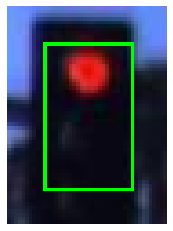

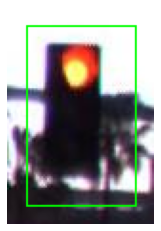

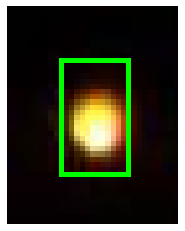

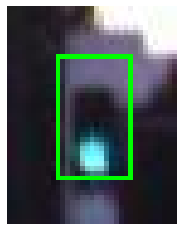

In [22]:
for idx, row in signal_annos.iterrows():
    
    im = cv2.imread(row['Path'])
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    img_data = np.copy(im)
    pts1 = (row['Roi.X1'], row['Roi.Y1'])
    pts2 = (row['Roi.X2'], row['Roi.Y2'])    
    img_data = cv2.rectangle(img_data, pts1, pts2, (0, 255, 0), thickness = 1)
    plt.imshow(img_data)
    plt.axis('off') 
    plt.show()
    if idx == 3:
        break

In [23]:
if os.path.exists(os.path.join(DESTINATION_PATH, 'frameAnnotationsBOX.csv')):
    os.remove(os.path.join(DESTINATION_PATH, 'frameAnnotationsBOX.csv'))

signal_annos.to_csv(os.path.join(DESTINATION_PATH, 'frameAnnotationsBOX.csv'), index = False)

In [24]:
del balanced_df
del signal_annos